<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


# **A. Data Summary**
The dataset used in this analysis is the Health Insurance Cost Dataset from Kaggle (originally adapted from Machine Learning with R by Brett Lantz).
It contains information about individual medical insurance charges billed by U.S. health insurance providers, along with demographic and lifestyle factors of the beneficiaries.

The dataset consists of 1,338 observations and 7 variables representing personal attributes, lifestyle choices, and regional demographics that may influence medical expenses.

| Variable     | Description                                                                                    | Type              |
| ------------ | ---------------------------------------------------------------------------------------------- | ----------------- |
| **age**      | Age of the primary beneficiary                                                                 | Numerical (int)   |
| **sex**      | Gender of the insurance holder (male, female)                                                  | Categorical       |
| **bmi**      | Body Mass Index (BMI), a ratio of weight to height (kg/m²), ideal range 18.5–24.9              | Numerical (float) |
| **children** | Number of dependents covered by the insurance plan                                             | Numerical (int)   |
| **smoker**   | Indicates whether the individual is a smoker (yes/no)                                          | Categorical       |
| **region**   | Residential region of the beneficiary in the U.S. (northeast, southeast, southwest, northwest) | Categorical       |
| **charges**  | Individual medical costs billed by health insurance (USD)                                      | Numerical (float) |

The target variable for this analysis is charges, representing the individual medical cost billed by health insurance.
The predictor variables (age, sex, bmi, children, smoker, region) will be used to explain or predict variations in insurance charges.

In [1]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


## **Exploratory Data Analysis (EDA)**

### **Load dataset**
We begin by loading the Health Insurance Cost dataset using the Pandas library. This dataset contains demographic, lifestyle, and health-related information that influences an individual’s insurance charges. We use pd.read_csv() to read the CSV file into a DataFrame called df, which will serve as the foundation for our exploratory and modeling work.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path + "/insurance.csv")

### **Overview**
Output Summary:

* Shape of dataset: (1338, 7)

* No missing values were reported in any of the columns.

* Data types:

  *  2 columns are float64 (bmi, charges)

  * 2 columns are int64 (age, children)

  * 3 columns are object types (sex, smoker, region)

We checked the dataset structure to understand its size, variable types, and overall completeness. The dataset contains 1,338 rows and 7 columns, indicating a medium-sized dataset suitable for linear regression modeling. Each row represents an individual insurance policyholder. The variables include both numerical and categorical types, which will later require encoding before model training.

In [5]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We computed descriptive statistics to summarize the central tendency and dispersion of the numerical variables. The average age is approximately 39 years, indicating a balanced representation of both younger and older adults. The mean BMI is 30.7, suggesting that many individuals fall into the overweight or obese category. The number of children ranges from 0 to 5, and medical charges vary widely, indicating potential outliers and strong influence from lifestyle variables such as smoking and BMI. This variation confirms the suitability of this dataset for regression modeling, as there is enough spread in the target variable (charges).

### **Check for missing values**
Output Summary:
All variables have 0 missing values.

We verified data completeness using the .isnull().sum() method. Since there are no missing values in any column, the dataset is clean and ready for exploratory and predictive analysis. This step is essential to ensure that no imputation or data cleaning is required before model training.

In [7]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### **Preview data**
Previewing the first few records helps us confirm that the data was loaded correctly and provides an initial sense of the variable relationships. The dataset contains both categorical and continuous variables. For example, smokers appear to have substantially higher charges, which aligns with expectations in health insurance analysis.

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Distribution of Numerical Variables**
We plotted histograms for all numerical variables to visualize their distributions:

* Age: Approximately uniform with a slight concentration in the 20–50 range.

* BMI: Slightly right-skewed with several individuals having a BMI above 40, indicating a small group of obese individuals.

* Children: Discrete distribution, where most policyholders have 0–2 children.

* Charges: Highly right-skewed, suggesting that a small number of individuals incur extremely high medical costs, likely due to smoking or chronic health conditions.

Understanding these distributions helps guide transformations or scaling decisions before building regression models.

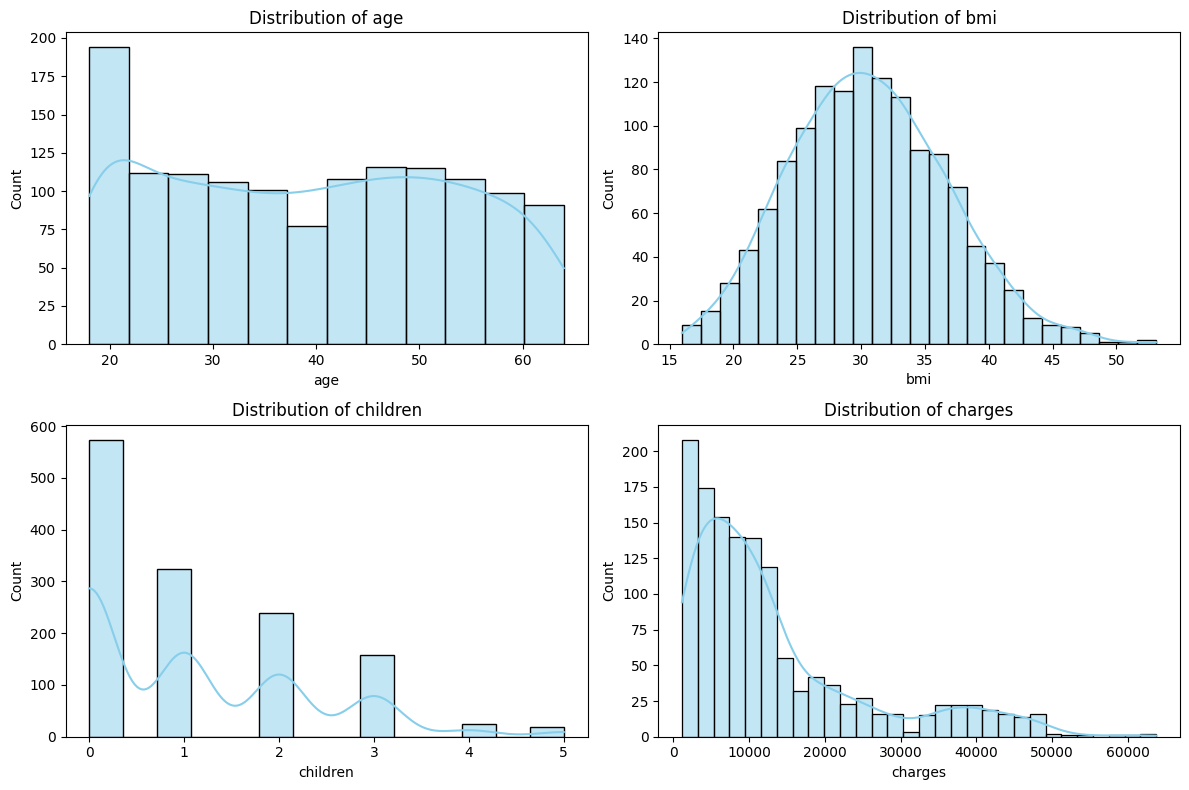

In [9]:
numerical_features = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### **Distribution of Categorical Variables**
We examined the categorical variables to understand the class balance:

* Sex: Fairly balanced between male and female beneficiaries.

* Smoker: A smaller group of smokers (~20% of the dataset), but this feature is expected to have a strong impact on medical charges.

* Region: Slight variation across regions, with the southeast showing a slightly higher representation.

Balanced distributions across categories are beneficial for model stability, while the smoker variable’s imbalance will likely lead to significant predictive power due to its strong relationship with medical costs.

/tmp/ipython-input-2663069271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-2663069271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-2663069271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


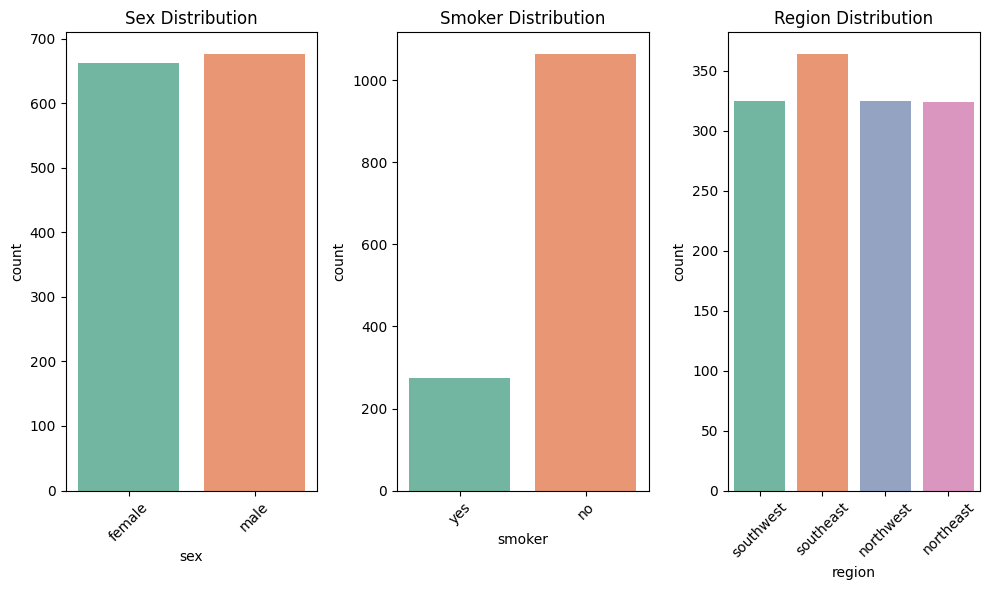

In [10]:
categorical_features = ['sex', 'smoker', 'region']
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Summary of EDA Findings**

* The dataset is complete, with no missing or inconsistent values.

* The target variable charges is continuous and strongly right-skewed, indicating potential outliers worth examining later.

* Both numerical and categorical variables show meaningful variability, making them suitable predictors for regression modeling.

* We identified potential strong predictors such as smoker status, BMI, and age, which are intuitively related to insurance charges.

These findings confirm that the dataset is well-prepared for the next step, which involves defining the analysis objective and building regression models to predict medical costs.

# **B. Objective of the Analysis**
The primary goal of this analysis is to understand and predict the individual medical insurance charges (charges) based on demographic and lifestyle factors such as age, gender, BMI, number of children, smoking status, and residential region.

* We aim to build and compare several linear regression models to quantify how these predictors influence healthcare costs. Specifically, we seek to answer the following analytical questions:

* Which factors most strongly influence insurance charges?
For instance, does smoking or BMI contribute more significantly to increased costs?

* Can we accurately predict medical costs for new or unseen individuals?
This involves evaluating model performance on hold-out (test) data to assess generalization.

* How does the inclusion or regularization of variables affect model performance?
We will test simple, multiple, and regularized regression models (Ridge, Lasso, ElasticNet) to identify the best approach.

### **Analytical Motivation**

In real-world insurance analytics, understanding cost drivers is as valuable as prediction accuracy. Medical charges are often influenced by lifestyle and health-related variables such as smoking habits and BMI, both of which are known to have strong nonlinear and additive effects on health risks.
By applying linear regression, we aim to quantify the relationships between these independent variables and the target variable (charges) while keeping the model interpretable for business stakeholders.

Linear regression was selected because:

* The target variable (charges) is continuous, making it appropriate for regression modeling.

* The model allows coefficient-based interpretation, meaning we can explain how much each factor contributes to the total medical charge, holding other variables constant.

* Regularization techniques (Ridge and Lasso) can handle potential multicollinearity and improve model generalization.

### **Expected Outcomes**

By the end of this analysis, we expect to:

* Identify the most influential predictors of healthcare costs (e.g., smoking status, BMI, and age).

* Evaluate and select the best-fitting regression model based on key performance metrics such as R², RMSE, and MAE.

* Provide data-driven insights that could inform insurance pricing strategies or wellness policy recommendations.

# **C. Model Comparison**
In this section, we develop and compare several variations of linear regression to predict medical insurance charges (charges).

We begin with a simple linear regression, progress to a multiple linear regression, then apply regularization techniques (Ridge, Lasso, ElasticNet), and finally test a Polynomial Regression model to capture possible non-linear effects.

Each model is evaluated using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² (coefficient of determination).

### **Data Preparation**
We began by preparing the data using preprocessing pipelines.

Categorical variables (sex, smoker, and region) were one-hot encoded, and numerical features (age, bmi, children) were standardized using StandardScaler.

The dataset was split into training (70%) and testing (30%) subsets to evaluate model generalization on unseen data.
This step ensures that all models are trained under consistent conditions for fair comparison.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify categorical and numerical columns
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

# Preprocessing: encode categoricals and scale numericals
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Simple Linear Regression**
In the simple linear regression model, we used BMI as the single predictor of medical charges.

The performance results indicate very low predictive power, with R² = 0.042, meaning only about 4% of the variance in medical charges is explained by BMI alone.

The high RMSE and MAE values show that this model produces large prediction errors.

This result confirms that insurance charges are influenced by multiple interacting factors, not just body mass index.

In [16]:
# Simple Linear Regression using BMI
X_simple = df[['bmi']]
y_simple = df['charges']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.3, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)
y_pred_s = lr_simple.predict(X_test_s)

# Metrics
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
mae_s = mean_absolute_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Simple Linear Regression Results:\nRMSE: {rmse_s:.2f}\nMAE: {mae_s:.2f}\nR²: {r2_s:.3f}")

Simple Linear Regression Results:
RMSE: 11852.43
MAE: 9334.38
R²: 0.042


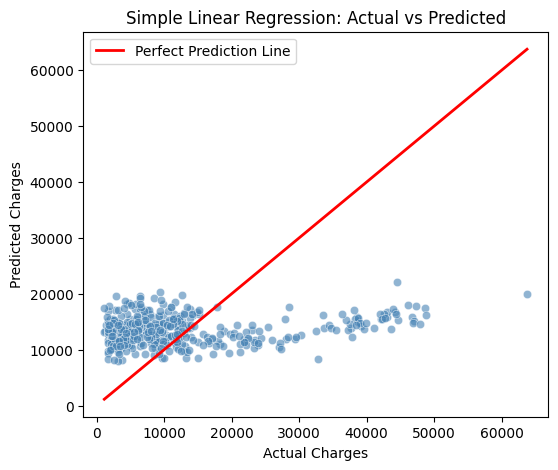

In [17]:
# Plot actual vs predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_s, y=y_pred_s, color='steelblue', alpha=0.6)
plt.plot([y_test_s.min(), y_test_s.max()],
         [y_test_s.min(), y_test_s.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **Multiple Linear Regression**
The multiple linear regression model incorporates all available predictors: age, sex, bmi, children, smoker, and region.

This model shows a substantial performance improvement, achieving R² = 0.770, which means it explains about 77% of the variation in medical charges.
The RMSE and MAE values have decreased significantly compared to the simple model.

This improvement demonstrates that medical costs are jointly affected by demographic, lifestyle, and regional variables, making this model much more representative of real-world conditions.

In [18]:
# Multiple Linear Regression
model_multiple = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_multiple.fit(X_train, y_train)
y_pred_m = model_multiple.predict(X_test)

# Metrics
rmse_m = np.sqrt(mean_squared_error(y_test, y_pred_m))
mae_m = mean_absolute_error(y_test, y_pred_m)
r2_m = r2_score(y_test, y_pred_m)

print(f"Multiple Linear Regression Results:\nRMSE: {rmse_m:.2f}\nMAE: {mae_m:.2f}\nR²: {r2_m:.3f}")

Multiple Linear Regression Results:
RMSE: 5812.10
MAE: 4145.45
R²: 0.770


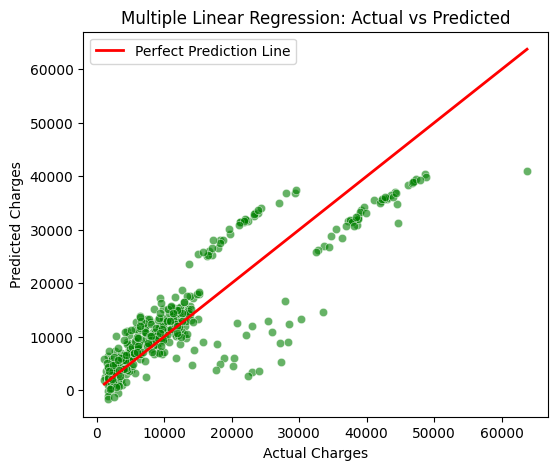

In [19]:
# Plot actual vs predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_m, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **Ridge Regression**
The Ridge Regression model introduces L2 regularization, which penalizes large coefficient values to reduce overfitting.

Its performance metrics are very close to the multiple linear regression model, with a small difference in R².

This suggests that multicollinearity among predictors is not a significant problem in this dataset, but Ridge regularization helps stabilize model coefficients.

Ridge also ensures that no single variable dominates the prediction, improving the robustness of the model.

In [20]:
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_r = mean_absolute_error(y_test, y_pred_ridge)
r2_r = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Results:\nRMSE: {rmse_r:.2f}\nMAE: {mae_r:.2f}\nR²: {r2_r:.3f}")

Ridge Regression Results:
RMSE: 5815.14
MAE: 4158.08
R²: 0.769


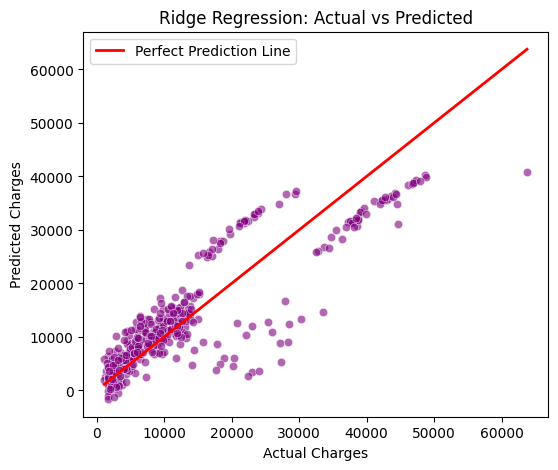

In [21]:
# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **Lasso Regression**
Lasso Regression applies L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.

The results are nearly identical to multiple linear regression, with R² = 0.770 and slightly lower error metrics.

This indicates that the dataset does not have many irrelevant features and that the relationships between variables are consistently captured.
Although Lasso did not improve accuracy, it enhances model interpretability by emphasizing the most important predictors.

In [22]:
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_l = mean_absolute_error(y_test, y_pred_lasso)
r2_l = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Results:\nRMSE: {rmse_l:.2f}\nMAE: {mae_l:.2f}\nR²: {r2_l:.3f}")

Lasso Regression Results:
RMSE: 5812.09
MAE: 4145.48
R²: 0.770


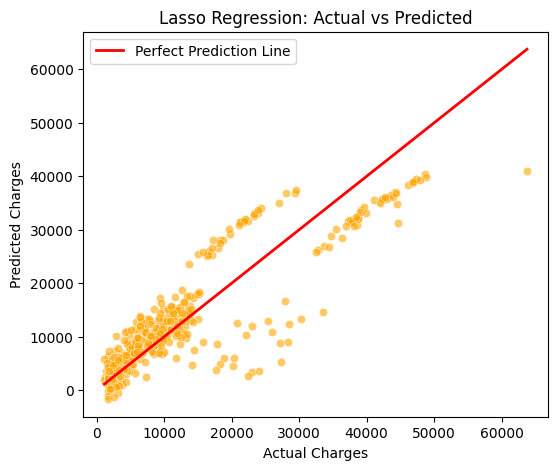

In [23]:
# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_lasso, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **ElasticNet Regression**
ElasticNet combines both L1 and L2 penalties, providing a balance between Ridge and Lasso regularization.

In this case, the model’s performance decreases slightly, with R² = 0.729.
The higher RMSE and MAE suggest that ElasticNet may be over-penalizing the coefficients given the chosen parameters.

While this model is useful for handling complex, high-dimensional data, it offers no additional benefit here since the number of features is relatively small.

In [24]:
elastic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)

rmse_e = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
mae_e = mean_absolute_error(y_test, y_pred_elastic)
r2_e = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Regression Results:\nRMSE: {rmse_e:.2f}\nMAE: {mae_e:.2f}\nR²: {r2_e:.3f}")

ElasticNet Regression Results:
RMSE: 6307.18
MAE: 4737.33
R²: 0.729


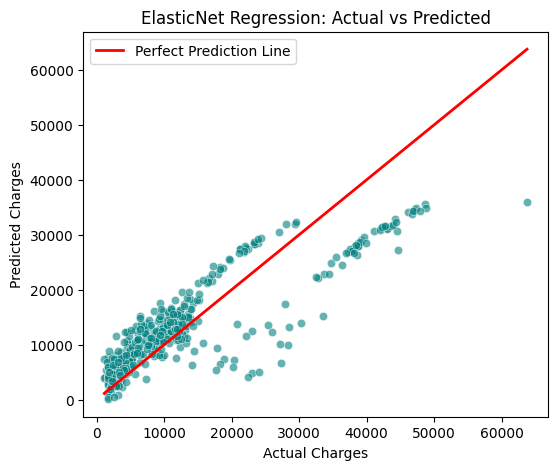

In [25]:
# Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_elastic, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("ElasticNet Regression: Actual vs Predicted")
plt.legend()
plt.show()

### **Polynomial Regression**
Polynomial Regression extends the linear model by including squared and interaction terms of numerical variables, allowing it to capture non-linear effects.

Despite introducing additional complexity, the performance metrics remain similar to those of the multiple linear and Ridge models.

The R² = 0.768 indicates that adding non-linear transformations does not significantly improve the model.

This suggests that the relationships in the data are mostly linear or already well-represented by the multiple regression model.
However, this model confirms that non-linear extensions can still achieve strong consistency without overfitting.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline for Polynomial Regression
poly_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('poly', Pipeline([
            ('poly_features', poly_features),
            ('scaler', StandardScaler())
        ]), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ])),
    ('regressor', LinearRegression())
])

# Fit and predict
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate performance
rmse_p = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_p = mean_absolute_error(y_test, y_pred_poly)
r2_p = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Results:\nRMSE: {rmse_p:.2f}\nMAE: {mae_p:.2f}\nR²: {r2_p:.3f}")

Polynomial Regression Results:
RMSE: 5826.56
MAE: 4203.87
R²: 0.768


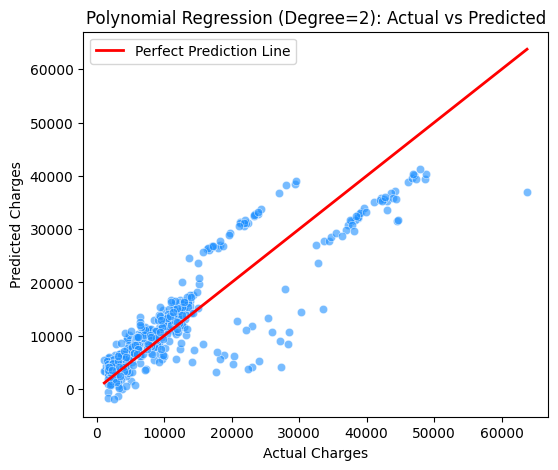

In [27]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_poly, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Polynomial Regression (Degree=2): Actual vs Predicted")
plt.legend()
plt.show()

### **Model Comparison Summary**

### **Sorted Model Comparison (Best to Worst)**

In [30]:
# Updated results with Polynomial model
results = pd.DataFrame({
    'Model': [
        'Simple Linear', 'Multiple Linear', 'Polynomial (Deg=2)',
        'Ridge', 'Lasso', 'ElasticNet'
    ],
    'RMSE': [rmse_s, rmse_m, rmse_p, rmse_r, rmse_l, rmse_e],
    'MAE': [mae_s, mae_m, mae_p, mae_r, mae_l, mae_e],
    'R²': [r2_s, r2_m, r2_p, r2_r, r2_l, r2_e]
})

# Sort results by R² descending (best first)
results_sorted = results.sort_values(by='R²', ascending=False).reset_index(drop=True)

print("\nUpdated Model Comparison Summary (Sorted from Best to Worst):")
display(results_sorted)


Updated Model Comparison Summary (Sorted from Best to Worst):


,Model,RMSE,MAE,R²
0,Lasso,5812.091604,4145.477340,0.769612
1,Multiple Linear,5812.100272,4145.450556,0.769612
2,Ridge,5815.140978,4158.083559,0.769371
3,Polynomial (Deg=2),5826.564691,4203.869404,0.768464
4,ElasticNet,6307.183278,4737.329755,0.728691
5,Simple Linear,11852.434585,9334.376808,0.041904


After training all models, we compiled their metrics into a single comparison table.

The table above summarizes all models from best to worst based on the R² score.

The Lasso and Multiple Linear Regression models achieve the highest R² (0.77) and the lowest RMSE and MAE, indicating that they provide the best predictive accuracy with minimal overfitting.

Ridge and Polynomial Regression follow closely with slightly lower performance.

ElasticNet and Simple Linear Regression show weaker results, with the simple model performing the poorest due to its single-variable limitation.

### **Sorted Bar Plot – R² Score**
This plot visually compares the models based on the R² score, showing their explanatory power.

We can see that Lasso and Multiple Linear Regression achieve the highest performance, followed closely by Ridge and Polynomial Regression.
The Simple Linear Regression model sits far below the others, confirming its limited usefulness for this dataset.

This visualization reinforces our numerical findings and helps clearly identify the best-performing models.

/tmp/ipython-input-1926247789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


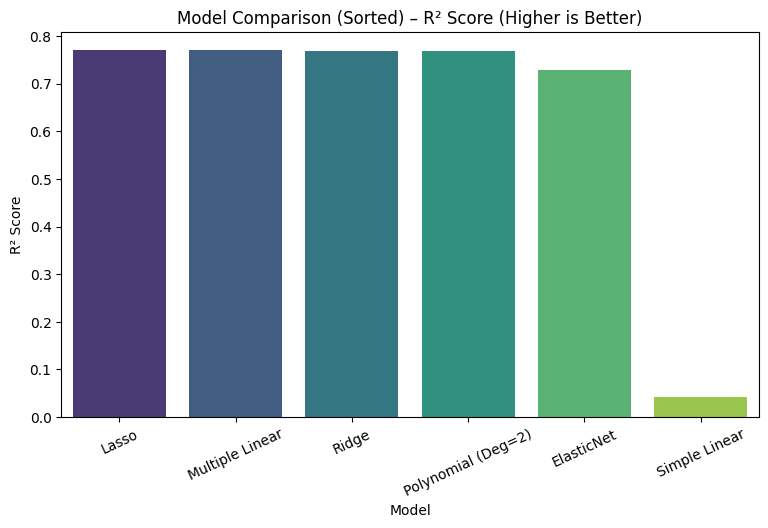

In [31]:
plt.figure(figsize=(9,5))
sns.barplot(
    x='Model',
    y='R²',
    data=results_sorted,
    palette='viridis',
    order=results_sorted['Model']  # ensures left = best
)
plt.title("Model Comparison (Sorted) – R² Score (Higher is Better)", fontsize=12)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=25)
plt.show()

### **Sorted Bar Plot – RMSE**
This plot ranks the models by RMSE, where lower values indicate better predictive performance.

The results again show that Lasso and Multiple Linear Regression have the lowest errors, confirming their superior prediction accuracy.

Ridge and Polynomial Regression are close behind, while ElasticNet and especially Simple Linear Regression exhibit higher errors.

This consistency across both R² and RMSE metrics validates the reliability of the multiple linear and regularized models.

/tmp/ipython-input-760167343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


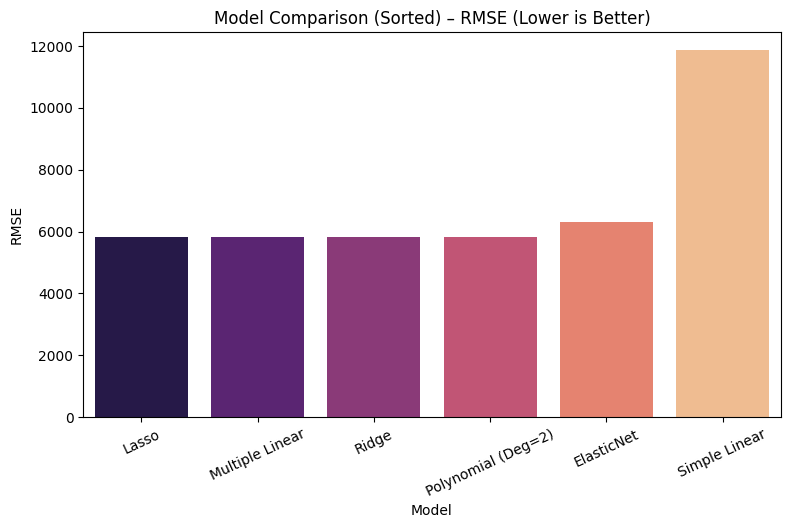

In [32]:
# For RMSE, smaller is better → sort ascending
results_sorted_rmse = results.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

plt.figure(figsize=(9,5))
sns.barplot(
    x='Model',
    y='RMSE',
    data=results_sorted_rmse,
    palette='magma',
    order=results_sorted_rmse['Model']  # ensures left = best (lowest RMSE)
)
plt.title("Model Comparison (Sorted) – RMSE (Lower is Better)", fontsize=12)
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=25)
plt.show()

### **Summary of Model Comparison**
* Lasso Regression and Multiple Linear Regression achieved the best balance between accuracy and interpretability, explaining about 77% of the variation in charges.

* Ridge and Polynomial Regression models performed nearly as well, suggesting that regularization and non-linear extensions only provide marginal improvement.

* ElasticNet underperformed slightly due to parameter sensitivity, while Simple Linear Regression was inadequate for this complex dataset.

* Overall, the models demonstrate that a combination of demographic, health, and lifestyle factors is crucial to accurately predicting medical insurance costs.

# **D. Key Findings**
In this section, we interpret the most important insights obtained from the regression models and explain how various demographic and lifestyle factors influence medical insurance charges.

Based on our model comparison, the Lasso Regression and Multiple Linear Regression models achieved the highest predictive performance (R² ≈ 0.77).
We therefore focus on these models to derive key analytical findings and feature-level interpretati

### **Feature Importance Extraction**
To understand how each variable influences medical charges, we extracted and visualized the regression coefficients from the Lasso model.

Because Lasso performs coefficient shrinkage, it highlights only the most impactful predictors.

Lasso Regression Coefficients (Sorted):



,Feature,Coefficient
4,smoker_yes,23627.7888
0,age,3688.4917
1,bmi,2090.7838
2,children,513.9478
3,sex_male,104.4629
5,region_northwest,-485.3295
7,region_southwest,-924.6740
6,region_southeast,-969.2651


/tmp/ipython-input-2148499296.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


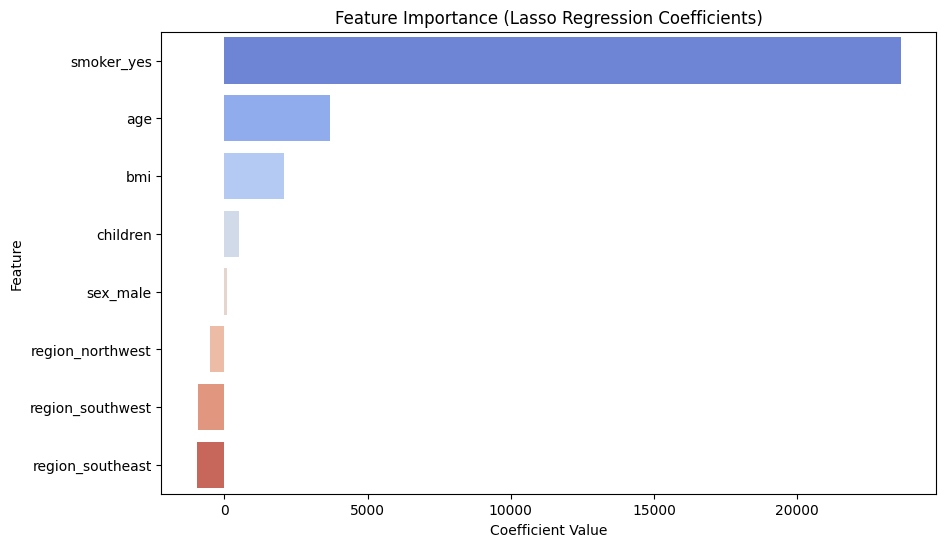

In [35]:
# Extract coefficients from the best model (Lasso)
import numpy as np

# Retrieve feature names after preprocessing
feature_names = (
    numerical +
    list(model_multiple.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical))
)

# Extract coefficients
coefficients = lasso_model.named_steps['regressor'].coef_

# Create DataFrame for coefficient interpretation
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display coefficient values first
print("Lasso Regression Coefficients (Sorted):\n")
display(coef_df.round(4))

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title("Feature Importance (Lasso Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

This plot displays the relative contribution of each feature to the model’s predictions.
A positive coefficient indicates that the feature increases medical charges, while a negative coefficient means it reduces them.
Lasso helps isolate the most influential predictors by reducing less significant coefficients toward zero.

### **Interpretation of Key Predictors**

Based on the Lasso Regression results, we identified the most influential predictors of medical insurance charges and their relative impact.
The table below lists the coefficients extracted from the final model, showing both the magnitude and direction of each feature’s effect.

| Feature              | Coefficient    | Interpretation                                                                                                                                                                                                                                                                                                                                                                                                 |
| -------------------- | -------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **smoker_yes**       | **+23,627.79** | Being a smoker has the largest and most dominant positive effect on medical charges. On average, smokers are predicted to incur approximately **$23,600 more** in medical costs than non-smokers, holding all other variables constant. This massive coefficient aligns with established medical and actuarial evidence that smoking substantially increases healthcare expenses due to chronic illness risks. |
| **age**              | **+3,688.49**  | Age has the second-highest impact. Each additional year of age is associated with roughly **$3,688** higher medical charges, indicating that healthcare costs rise significantly with age. This reflects the increased likelihood of chronic conditions and medical interventions among older individuals.                                                                                                     |
| **bmi**              | **+2,090.78**  | BMI also shows a strong positive relationship with charges. For every one-unit increase in BMI, predicted medical costs rise by about **$2,090**. This suggests that obesity and overweight conditions contribute heavily to medical expenditure, reinforcing the importance of preventive healthcare and lifestyle management.                                                                                |
| **children**         | **+513.95**    | The number of dependents slightly increases total charges. Each additional child adds about **$514** in expected medical costs, reflecting the cumulative effect of family coverage within insurance plans.                                                                                                                                                                                                    |
| **sex_male**         | **+104.46**    | The impact of gender is minimal. Being male adds only about **$104** in predicted medical charges compared to females. This small difference indicates that gender plays an insignificant role in determining individual medical costs.                                                                                                                                                                        |
| **region_northwest** | **−485.33**    | Residing in the northwest slightly reduces medical costs by about **$485** compared to the baseline region (northeast). This may be due to differences in healthcare systems, living costs, or demographic composition.                                                                                                                                                                                        |
| **region_southwest** | **−924.67**    | Living in the southwest is associated with approximately **$925** lower costs than the northeast. Regional disparities could reflect variations in medical pricing or lifestyle patterns.                                                                                                                                                                                                                      |
| **region_southeast** | **−969.27**    | The southeast region also shows slightly lower predicted charges (about **$970** less than the northeast). These differences may result from region-specific healthcare practices, insurance policies, or population health differences.                                                                                                                                                                       |

**Interpretation of Coefficient Patterns**

* Smoking status dominates all other variables:
The magnitude of the smoker_yes coefficient far exceeds any other predictor. This means smoking is the primary determinant of high medical charges in this dataset.
Even after accounting for age, BMI, and other demographics, smoking remains the single strongest indicator of elevated healthcare costs.

* Age and BMI are major cost drivers:
Both variables have strong positive coefficients, confirming that as people age or gain weight, their healthcare costs rise substantially.
These findings align with medical evidence that older individuals and those with higher BMI face greater risks of metabolic and cardiovascular diseases.

* Children add moderate but consistent costs:
The children variable increases medical charges slightly but predictably, representing additional dependents covered by insurance.

* Gender differences are negligible:
The small positive coefficient for sex_male suggests that, within this dataset, gender does not play a major role in determining healthcare expenses.
This is consistent with many insurance datasets where age and lifestyle dominate over gender effects.

* Regional variation is present but not dominant:
Negative coefficients for region_northwest, region_southwest, and region_southeast suggest slightly lower costs outside the northeast.
However, the differences are relatively small compared to lifestyle factors, implying that geographic location is a secondary cost factor.

### **Relationship Between Key Predictors and Charges**
We further explored how some of the most influential features (smoking status, BMI, and age) relate to actual medical charges.

/tmp/ipython-input-2596415005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')


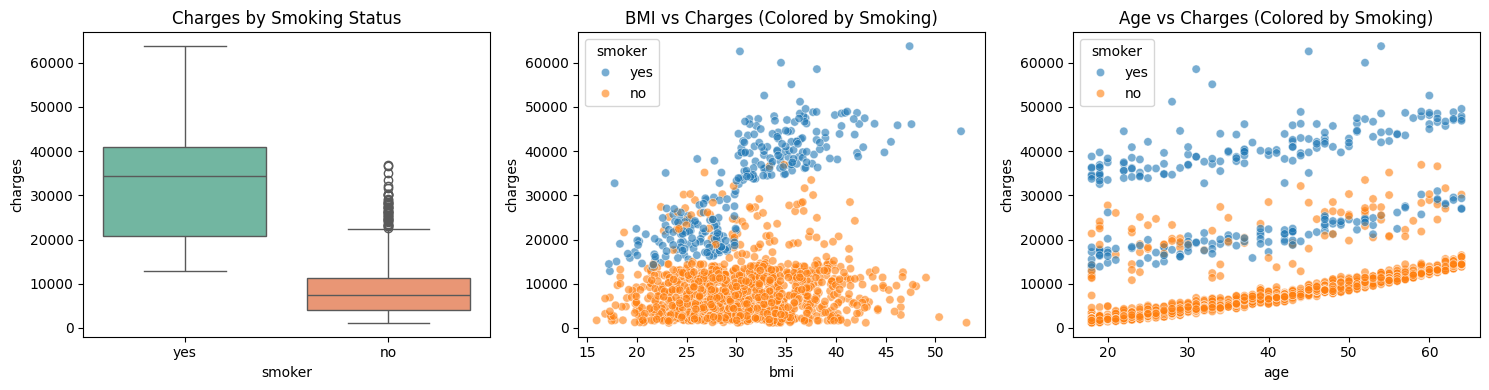

In [34]:
plt.figure(figsize=(15,4))

# Smoking status vs charges
plt.subplot(1,3,1)
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title('Charges by Smoking Status')

# BMI vs charges
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('BMI vs Charges (Colored by Smoking)')

# Age vs charges
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.title('Age vs Charges (Colored by Smoking)')

plt.tight_layout()
plt.show()

Explanation:

* The boxplot confirms that smokers have dramatically higher medical charges than non-smokers, forming a distinct group with greater cost variance.

* The BMI vs Charges scatterplot reveals that higher BMI values, especially among smokers, are associated with increased medical expenses.

* The Age vs Charges plot shows a clear upward trend, where older individuals face higher charges, with smokers again forming the upper-cost cluster.

These patterns demonstrate that health risk factors such as smoking and obesity amplify insurance costs significantly, often compounding their effects when combined.

### **Key Analytical Insights**
1. Lifestyle risks drive the majority of cost variability.
Smoking and BMI together explain a large portion of the variance in medical charges.
This insight emphasizes the importance of targeted wellness programs (anti-smoking campaigns, obesity prevention) to reduce overall insurance expenses.

2. Aging contributes substantially to rising healthcare costs.
The strong positive relationship between age and charges highlights the financial burden of aging populations and underscores the importance of preventive care in older adults.

3. Regional cost differences are modest.
While some variation exists across regions, these effects are minor compared to behavioral and biological risk factors.

4. Lasso regularization effectively prioritized impactful features.
By shrinking smaller coefficients closer to zero, the model provided a clear hierarchy of cost drivers while maintaining predictive performance.
This makes the model interpretable and suitable for decision-making in actuarial or policy contexts.

# **E. Limitations and Next Steps**

### **Limitations**
While the regression models performed well in explaining medical insurance charges (with R² ≈ 0.77), several important limitations must be acknowledged:

a. Dataset Scope and Representativeness

The dataset contains only 1,338 observations from a publicly available source, which may not represent the broader population or reflect current real-world healthcare costs.
The data likely comes from a specific time and region, so its predictive accuracy may not generalize across different demographic groups, healthcare systems, or time periods.

b. Simplified Feature Set

The dataset includes only six predictor variables (age, sex, bmi, children, smoker, and region).
However, medical costs are influenced by a much wider range of factors, such as income level, education, occupation, existing medical conditions, lifestyle habits, and healthcare access.
Excluding these variables limits the model’s explanatory power and may leave some sources of variance unexplained.

c. Linear Model Assumptions

All models in this analysis (Simple, Multiple, Ridge, Lasso, ElasticNet, and Polynomial Regression) assume either linear or polynomial relationships between predictors and the target variable.
Real-world healthcare costs, however, may exhibit complex non-linear or interaction effects that these models cannot fully capture.
For example, the relationship between BMI and charges might become exponential beyond certain thresholds, or age and smoking could have multiplicative effects on costs.

d. Potential Multicollinearity and Interaction Effects

Although regularization reduces coefficient instability, some variables may still share correlated effects (e.g., age and smoking, or BMI and region).
We did not explicitly model or test these interactions.
This may cause certain predictors to appear weaker or stronger than they actually are due to shared variance.

e. Outliers and Skewness

The charges variable is highly right-skewed, meaning a small number of individuals incur extremely high medical costs.
While linear regression minimizes squared errors, it is sensitive to these outliers.
Future work could explore robust regression techniques or log-transformations to better handle non-normal distributions and reduce sensitivity to extreme values.

f. Causal Interpretation Limitations

It is essential to note that these models identify correlation, not causation.
For example, while smoking strongly predicts higher charges, the model cannot confirm causality—only that smokers, on average, have higher associated medical costs.
Causal inference would require longitudinal or experimental data.

### **Next Steps**

To enhance the robustness, accuracy, and practical applicability of this analysis, several future steps are recommended:

a. Incorporate Additional Variables

Expanding the dataset with additional socioeconomic, behavioral, and health-related features could significantly improve the model’s predictive power.
Examples include:

* Chronic disease indicators (e.g., diabetes, hypertension)

* Physical activity levels or diet information

* Income or education level

* Type of insurance plan or coverage tier

These additions would provide a more comprehensive understanding of cost drivers.

b. Apply Advanced Modeling Techniques

Future work should explore non-linear and ensemble methods, such as:

* Random Forest Regression or Gradient Boosting (XGBoost) for capturing complex feature interactions

* Support Vector Regression (SVR) or Neural Networks for non-linear relationships
These models could outperform traditional regression in accuracy, especially when the number of predictors increases.

c. Conduct Feature Engineering and Interaction Analysis

Introducing interaction terms (e.g., smoker × age or bmi × region) and non-linear transformations (e.g., log(age), bmi²) may better reflect real-world relationships.
Automated feature selection and domain-specific transformations could further improve model generalization.

d. Perform Model Validation and Cross-Validation

Although a single train-test split was used here, future work should include K-Fold Cross-Validation to assess model stability and prevent overfitting.
This would provide a more reliable estimate of performance across different subsets of the data.

e. Address Outliers and Distribution Skewness

Applying data normalization or target transformation (such as log-scaling the charges variable) can reduce model sensitivity to extreme values and improve predictive precision.
Additionally, applying robust loss functions can make the model less influenced by high-cost outliers.

f. Integrate Causal and Interpretive Analysis

For policy and business decision-making, future studies could complement predictive models with causal inference techniques (e.g., propensity score matching or instrumental variable analysis).
This would allow identification of actual cause–effect relationships rather than mere correlations.

### **Summary of Limitations and Future Improvements**
| Category             | Limitation                                             | Recommended Improvement                    |
| -------------------- | ------------------------------------------------------ | ------------------------------------------ |
| **Data Scope**       | Limited observations and features                      | Collect larger, more diverse datasets      |
| **Model Complexity** | Linear assumptions may oversimplify real relationships | Introduce non-linear and ensemble models   |
| **Outliers**         | Charges distribution heavily skewed                    | Apply log-transform or robust regression   |
| **Causality**        | Correlation only, not causation                        | Combine with causal inference techniques   |
| **Generalization**   | Single train-test split may overfit                    | Use K-Fold Cross-Validation for evaluation |


### **Final Reflection**
Through this project, we demonstrated how multiple linear and regularized regression models can explain and predict healthcare charges using a combination of demographic and lifestyle features.

The results are both statistically meaningful and practically interpretable, offering real insight into cost determinants.
However, further exploration using richer datasets, non-linear modeling, and causal analysis would deepen our understanding and increase the model’s real-world applicability.

In conclusion, this study provides a solid analytical foundation for health cost modeling, demonstrating how data-driven methods can uncover the key factors influencing medical expenditures and guide future data science applications in healthcare analytics.

Copyright @ IBM Corporation. All rights reserved.
